In [102]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt 


df_combo = pd.read_csv('../data/combo.csv')
df_combo

,Unnamed: 0,country_name,Alpha3,N20_49,P20_49,Incidence Per Age Capita,year,animal_product_kg_cap_yr
0,0,Algeria,DZA,239.6,521398.2,0.000460,2008,143.81
1,1,Argentina,ARG,2193.0,2154171.2,0.001018,2008,309.36
2,2,Australia,AUS,15008.4,9393734.8,0.001598,2008,347.19
3,3,Austria,AUT,4731.6,3591460.6,0.001317,2008,336.16
4,4,Belarus,BLR,5868.4,4277173.4,0.001372,2008,234.05
5,5,Belgium,BEL,8990.0,4415506.8,0.002036,2008,334.96
6,6,Brazil,BRA,2606.8,1906659.0,0.001367,2008,222.88
7,7,Brunei Darussalam,BRN,92.4,81288.4,0.001137,2008,187.55
8,8,Bulgaria,BGR,4167.2,3156401.0,0.001320,2008,206.79
9,9,Canada,CAN,16170.4,11153751.4,0.001450,2008,313.79


In [2]:
df_combo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                60 non-null     int64  
 1   country_name              60 non-null     object 
 2   Alpha3                    60 non-null     object 
 3   N20_49                    60 non-null     int64  
 4   P20_49                    60 non-null     int64  
 5   Incidence Per Age Capita  60 non-null     float64
 6   year                      60 non-null     int64  
 7   animal_product_kg_cap_yr  60 non-null     float64
dtypes: float64(2), int64(4), object(2)
memory usage: 3.9+ KB


In [3]:
df_combo.describe()

,Unnamed: 0,N20_49,P20_49,Incidence Per Age Capita,year,animal_product_kg_cap_yr
count,60.000000,6.000000e+01,6.000000e+01,60.000000,60.0,60.000000
mean,29.500000,1.305522e+05,3.348963e+07,0.349631,2008.0,240.345000
std,17.464249,3.807433e+05,8.555705e+07,0.120041,0.0,106.849534
min,0.000000,1.377000e+03,4.064420e+05,0.103278,2008.0,47.340000
25%,14.750000,1.170850e+04,4.777069e+06,0.262228,2008.0,161.285000
50%,29.500000,3.487900e+04,1.055797e+07,0.373238,2008.0,242.850000
75%,44.250000,9.108675e+04,2.313052e+07,0.438728,2008.0,336.397500
max,59.000000,2.867201e+06,6.332272e+08,0.613201,2008.0,435.840000


In [22]:
df_combo[['country_name','Incidence Per Age Capita', 'animal_product_kg_cap_yr']].corr(method='pearson')

,Incidence Per Age Capita,animal_product_kg_cap_yr
Incidence Per Age Capita,1.000000,0.770176
animal_product_kg_cap_yr,0.770176,1.000000


In [23]:
df_grp = df_combo.groupby (['country_name'])
df_combo['Incidence Per Age Capita'].corr(df_combo['animal_product_kg_cap_yr'])

0.7701764497730108

In [24]:
#most and least correlated
df_combo['corr_diff'] = df_combo['animal_product_kg_cap_yr'] - df_combo['Incidence Per Age Capita']

In [31]:
# least correlated
df_combo.sort_values('corr_diff', ascending=True).head(10)


,Unnamed: 0,country_name,Alpha3,N20_49,P20_49,Incidence Per Age Capita,year,animal_product_kg_cap_yr,corr_diff
59,59,Zimbabwe,ZWE,6269,2134668,0.293676,2008,47.34,47.046324
41,41,Philippines,PHL,68352,33302590,0.205245,2008,48.54,48.334755
53,53,Uganda,UGA,12489,4886551,0.255579,2008,51.83,51.574421
58,58,Viet Nam,VNM,26153,16874726,0.154983,2008,57.07,56.915017
51,51,Thailand,THA,69984,29644760,0.236075,2008,62.09,61.853925
40,40,Peru,PER,33922,13011585,0.260706,2008,81.67,81.409294
23,23,India,IND,173315,117677404,0.147280,2008,82.21,82.062720
34,34,Malaysia,MYS,9685,3981800,0.243232,2008,89.28,89.036768
11,11,China,CHN,498349,155312477,0.320869,2008,99.99,99.669131
30,30,Kenya,KEN,11329,8737570,0.129658,2008,110.24,110.110342


In [32]:
# most correlated
df_combo.sort_values('corr_diff', ascending=False).head(10)

,Unnamed: 0,country_name,Alpha3,N20_49,P20_49,Incidence Per Age Capita,year,animal_product_kg_cap_yr,corr_diff
36,36,Netherlands,NLD,160240,33816416,0.473853,2008,435.84,435.366147
33,33,Lithuania,LTU,29179,6457463,0.451865,2008,398.79,398.338135
24,24,Ireland,IRL,48341,10345084,0.467285,2008,398.72,398.252715
50,50,Switzerland,CHE,45151,9577081,0.471448,2008,393.84,393.368552
56,56,United States of America,USA,2867201,633227216,0.452792,2008,389.98,389.527208
26,26,Italy,ITA,282166,51203013,0.551073,2008,365.87,365.318927
17,17,Denmark,DNK,67138,10948767,0.613201,2008,358.53,357.916799
47,47,Slovenia,SVN,19690,4448623,0.442609,2008,356.75,356.307391
21,21,Germany,DEU,566848,108764522,0.521170,2008,350.77,350.248830
2,2,Australia,AUS,224838,46968674,0.478698,2008,347.19,346.711302


In [34]:
plt.style.use('ggplot') # I also like fivethirtyeight'
#matplotlib.rcParams.update({'font.size': 16, 'font.family': 'sans'})

Text(0, 0.5, 'Animal Product Consumption kg p/Capita')

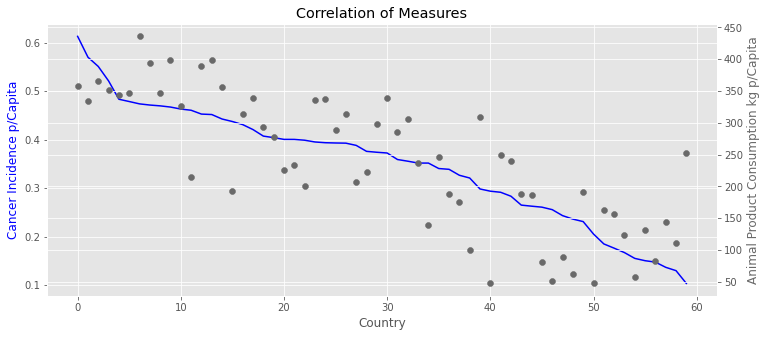

In [101]:
# For the line chart, all, sort by pop size?.
# Twin Axes

df_ranked = df_combo.sort_values('Incidence Per Age Capita', ascending=False).reset_index()
fig, ax = plt.subplots(figsize=(12,5))

x = np.arange(len(df_ranked['Incidence Per Age Capita']))
y1 = df_ranked['Incidence Per Age Capita']
y2 = df_ranked['animal_product_kg_cap_yr']

ax.set_title('Correlation of Measures')
ax.plot(x, y1, color='b')
ax.set_ylabel('Cancer Incidence p/Capita', color='b')
ax.set_xlabel('Country')

ax2=ax.twinx()
ax2.scatter(x, y2, color='dimgrey')
ax2.set_ylabel('Animal Product Consumption kg p/Capita', color='dimgrey')

# dual axis


In [81]:
df_bar = df_combo.sort_values('corr_diff', ascending=False).iloc[:10, :]

df_bar2 = df_combo.sort_values('corr_diff', ascending=True).iloc[:10, :]
df_bar2

,Unnamed: 0,country_name,Alpha3,N20_49,P20_49,Incidence Per Age Capita,year,animal_product_kg_cap_yr,corr_diff
59,59,Zimbabwe,ZWE,6269,2134668,0.293676,2008,47.34,47.046324
41,41,Philippines,PHL,68352,33302590,0.205245,2008,48.54,48.334755
53,53,Uganda,UGA,12489,4886551,0.255579,2008,51.83,51.574421
58,58,Viet Nam,VNM,26153,16874726,0.154983,2008,57.07,56.915017
51,51,Thailand,THA,69984,29644760,0.236075,2008,62.09,61.853925
40,40,Peru,PER,33922,13011585,0.260706,2008,81.67,81.409294
23,23,India,IND,173315,117677404,0.147280,2008,82.21,82.062720
34,34,Malaysia,MYS,9685,3981800,0.243232,2008,89.28,89.036768
11,11,China,CHN,498349,155312477,0.320869,2008,99.99,99.669131
30,30,Kenya,KEN,11329,8737570,0.129658,2008,110.24,110.110342


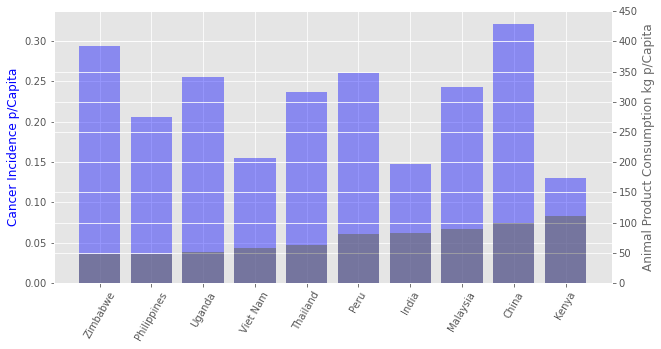

In [94]:
# Where is it the most and least correlated?  This is LEAST correlated
# For the bar chart, let's have only top/bottom
# top10
#df_bar = df_combo.sort_values('corr_diff', ascending=False).iloc[:7, :]  # has biggest corr_diff
#df_bar2 = df_combo.sort_values('corr_diff', ascending=False).iloc[:-7, :]  # has smaller corr_diff

fig, ax  = plt.subplots(figsize=(10,5))

x = np.arange(len(df_bar2['country_name']))
y1 = df_bar2['Incidence Per Age Capita']
y2 = df_bar2['animal_product_kg_cap_yr']


ax.bar(x, y1, alpha = .4, color='b')
ax.set_xticks(x)
ax.set_xticklabels(df_bar2['country_name'], rotation=60)
ax.set_ylabel('Cancer Incidence p/Capita', color='b')

ax2=ax.twinx()
ax2.bar(x, y2, alpha = .6, color = 'dimgrey')
ax2.set_ylim ([0,450])
ax2.set_ylabel('Animal Product Consumption kg p/Capita', color='dimgrey');


Text(0, 0.5, 'Animal Product Consumption kg p/Capita')

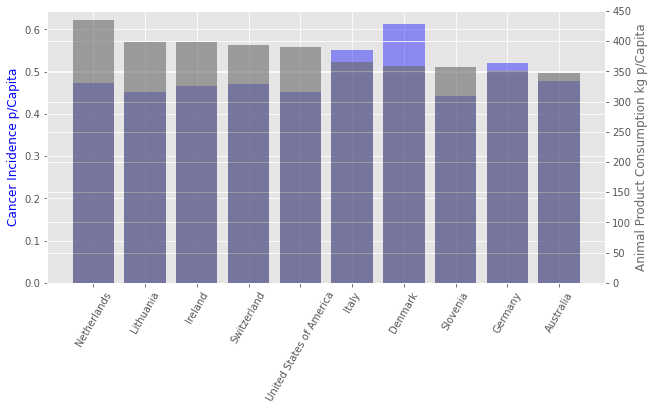

In [95]:
# MOST correlated
# top10
#df_bar = df_combo.sort_values('corr_diff', ascending=False).iloc[:7, :]  # has biggest corr_diff
#df_bar2 = df_combo.sort_values('corr_diff', ascending=False).iloc[:-7, :]  # has smaller corr_diff

fig, ax  = plt.subplots(figsize=(10,5))

x = np.arange(len(df_bar['country_name']))
y1 = df_bar['Incidence Per Age Capita']
y2 = df_bar['animal_product_kg_cap_yr']


ax.bar(x, y1, alpha = .4, color='b')
ax.set_xticks(x)
ax.set_xticklabels(df_bar['country_name'], rotation=60);
ax.set_ylabel('Cancer Incidence p/Capita', color='b')

ax2=ax.twinx()
ax2.bar(x, y2, alpha = .6, color = 'dimgrey')
ax2.set_ylim ([0,450])
ax2.set_ylabel('Animal Product Consumption kg p/Capita', color='dimgrey')